## Avaliando datasets modificados pelo bert_tokenizer (sem oov)
##### Configurações

- bert base neuralmind, com log_softmax
- todos os tokens do dataset têm tamanho 1
- tamanho corpus (para comparação): 15M, 30M, 60M, 120M, 240M
- 15M N=570 True=275
- 30M N=573 True=276
- 60M N=574 True=276
- 120M N=574 True=276
- 240M N=574 True=276

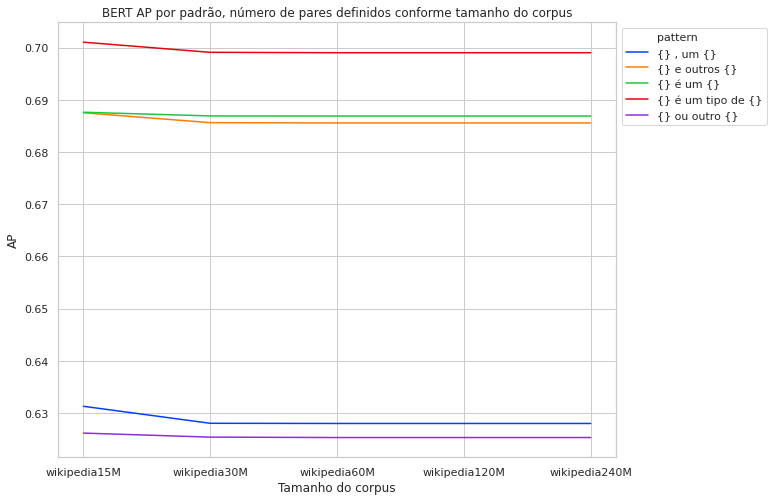

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", palette="bright")

path = "../results/neuralmind-bert-base-portuguese-cased-by_pattern/result.tsv"
df = pd.read_csv(path, delimiter="\t")
df = df[(df['method'] == "all_subword") & (df['corpus'] != "bert")]
df['size_corpus'] = pd.to_numeric(df['corpus'].str[9:-1])
df = df.sort_values(by="size_corpus", ascending=True)
plt.figure(figsize=(10,8))
ax = sns.lineplot(x="corpus", y="AP", hue="pattern", ci="sd", sort=False, data=df)
ax.legend(bbox_to_anchor=(1, 1))
ax.set(xlabel="Tamanho do corpus")
ax.set_title(f"BERT AP por padrão, número de pares definidos conforme tamanho do corpus")
plt.show()

